In [9]:
#MOBISA KWAMBOKA YVONNE
#DATA SCIENCE SEMESSTER PROJECT
#This project will create KNN model, an unsupervised learning algorithm.

#The link to the datset on Kaggle.
#The dataset is too big to be uploaded to E-masomo.
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv

import numpy as np
import pandas as pd
creditData = pd.read_csv('C:/Users/Bina/Downloads/creditcard.csv/creditcard.csv', delimiter = ',')
#pre-processing the data by
 #1. Removing the 'Time' column as it is irrelevant to the model
creditData.drop('Time', axis = 1, inplace = True)
print(creditData)


               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.01830

In [11]:
#pre-processing the data by
 #1. Normalizing the 'Amount' column using the StandardScaler method
 #2. Splitting the data into traing and testing sets using train_test_split


from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
creditData['Amount'] = scaler.fit_transform(creditData['Amount'].values.reshape(-1,1))
# print (creditData)

In [12]:
#splitting the data into traing and testing sets
from sklearn.model_selection import train_test_split
X = creditData.drop('Class', axis = 1)
y =creditData['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [15]:
#Creating the KNN model and fit the training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
#fitting the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
#evaluating the model's performance
#1. predicting the labels for the testing data
y_pred = knn.predict(X_test)

# Calculate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[85293    14]
 [   31   105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.77      0.82       136

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



<Axes: >

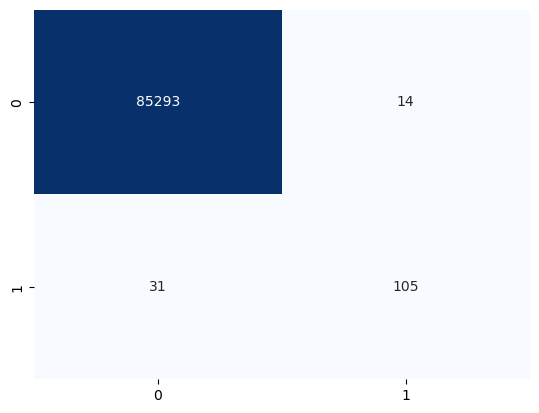

In [18]:
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
